In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as stats

In [2]:
client_id = 
client_secret = 

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [4]:
top200weekly = pd.read_csv("alltopwithfeatures.csv")

In [5]:
playlists = pd.read_csv("allplaylist.csv")

In [6]:
top200weekly["key"].value_counts()

1     5923
0     4497
11    4254
8     3980
7     3729
5     3527
6     3380
10    3229
2     3176
9     3166
4     2728
3      811
Name: key, dtype: int64

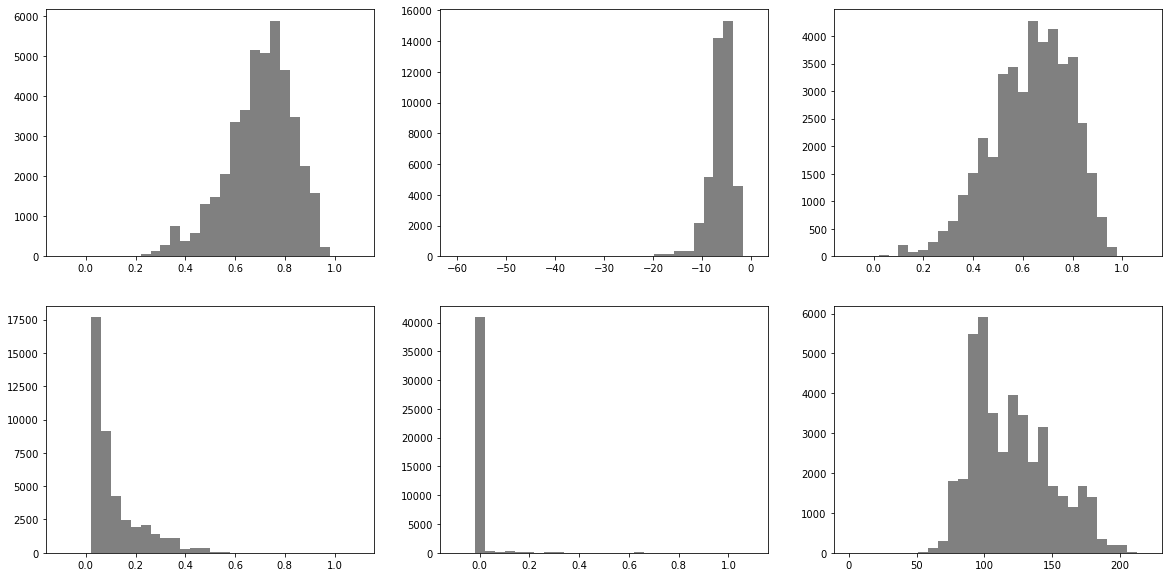

In [49]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].hist(top200weekly['danceability'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[0, 1].hist(top200weekly['loudness'], 30, range=[-60.5, 0.5], facecolor='gray', align='mid')
axs[0, 2].hist(top200weekly['energy'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 0].hist(top200weekly['speechiness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 1].hist(top200weekly['instrumentalness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 2].hist(top200weekly['tempo'], 30, range=[0, 220], facecolor='gray', align='mid')
plt.show()

In [8]:
top200weekly = top200weekly.set_index("fechas")

In [9]:
top200weekly.head()

,id,name,popularity,duration,artist,album,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
fechas,,,,,,,,,,,,,,,,,,,
2021-01-29--2021-02-05,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,drivers license,100,242013,Olivia Rodrigo,drivers license,2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
2021-01-29--2021-02-05,https://open.spotify.com/track/4MzXwWMhyBbmu6h...,DÁKITI,89,205090,Bad Bunny,EL ÚLTIMO TOUR DEL MUNDO,2020-11-27,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,4
2021-01-29--2021-02-05,https://open.spotify.com/track/0VjIjW4GlUZAMYd...,Blinding Lights,95,200040,The Weeknd,After Hours,2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
2021-01-29--2021-02-05,https://open.spotify.com/track/5QO79kh1waicV47...,Save Your Tears,93,215626,The Weeknd,After Hours,2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
2021-01-29--2021-02-05,https://open.spotify.com/track/3tjFYV6RSFtuktY...,Mood (feat. iann dior),94,140525,24kGoldn,Mood (feat. iann dior),2020-07-24,0.700,0.722,7,-3.558,0,0.0369,0.22100,0.000000,0.2720,0.756,90.989,4


In [10]:
top200weekly.loc[top200weekly.index=="2021-01-29--2021-02-05"]["key"].value_counts()

11    22
1     22
0     22
4     21
8     20
6     20
7     16
5     15
10    14
2     14
9     10
3      4
Name: key, dtype: int64

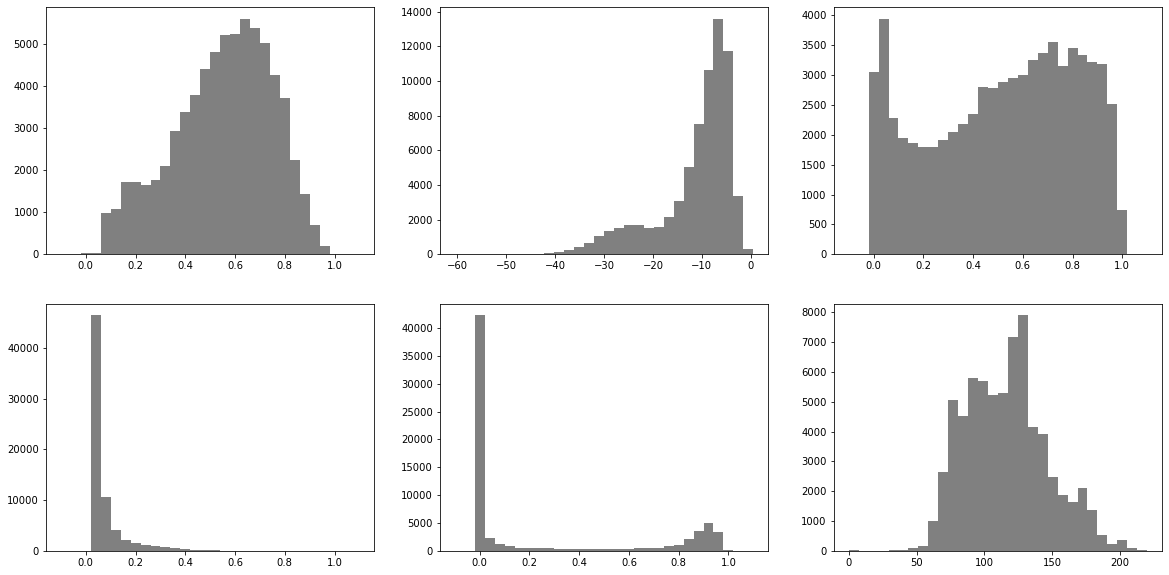

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].hist(playlists['danceability'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[0, 1].hist(playlists['loudness'], 30, range=[-60.5, 0.5], facecolor='gray', align='mid')
axs[0, 2].hist(playlists['energy'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 0].hist(playlists['speechiness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 1].hist(playlists['instrumentalness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 2].hist(playlists['tempo'], 30, range=[0, 220], facecolor='gray', align='mid')
plt.show()

In [12]:
df_test1 = playlists
df_test2 = top200weekly

In [13]:
df_test1
df_test1['release_date'] = pd.to_datetime(df_test1['release_date'])

In [14]:
df_test1["release_date_value"]= pd.to_datetime("today")

In [15]:
df_test1["release_date_value"]= df_test1["release_date_value"]-df_test1['release_date']

In [16]:
df_test1["release_date_value"]= pd.to_numeric(df_test1['release_date'])
df_test1["release_date_value"]

0        1610409600000000000
1        1610668800000000000
2        1605225600000000000
3        1588291200000000000
4        1610582400000000000
                ...         
69362    1528070400000000000
69363    1454284800000000000
69364    1534204800000000000
69365    1469145600000000000
69366    1526601600000000000
Name: release_date_value, Length: 69367, dtype: int64

In [17]:
df_test1["release_date_value"]=df_test1["release_date_value"].astype('timedelta64[D]')

In [18]:
df_test1

,id,name,popularity,duration,artist,album,release_date,playlist,playlist_id,playlist_category,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date_value
0,5SFXOMJJ334Wn2PwBHeRZN,Girls Like Us,76,189000,Zoe Wees,Girls Like Us,2021-01-12,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-4.955,1,0.0476,0.28800,0.000000,0.059,0.171,125.706,5,-57068 days +12:02:05.328719
1,5YaskwnGDZFDRipaqzbwQx,Your Love (9PM),80,150052,ATB,Your Love (9PM),2021-01-15,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-5.603,1,0.1120,0.19400,0.000006,0.115,0.517,125.993,4,34228 days 15:45:52.782704
2,5ri4zqtWhG07hIuNNDWP76,Fly Away,82,178156,Tones And I,Fly Away,2020-11-13,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.208,1,0.0685,0.21700,0.000000,0.217,0.503,124.988,4,38545 days 05:37:19.634989
3,46lyJh9GYmWsHez3EsvmAx,Rise Up (feat. Vamero),76,182000,VINAI,Rise Up (feat. Vamero),2020-05-01,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-3.633,1,0.0488,0.01100,0.000000,0.162,0.359,126.037,4,-19194 days +14:12:31.938912
4,4hSJUp6k7QeHLxU32MrLIU,Ohne Dich,83,125720,KASIMIR1441,Ohne Dich,2021-01-14,Top Hits Deutschland,37i9dQZF1DX4jP4eebSWR9,toplists,...,-6.519,0,0.3490,0.19100,0.000000,0.125,0.925,156.013,4,-67372 days +14:39:45.728192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69362,0JQPxSYL6alc9UvsPvBoFA,Light,45,209510,Wanna One,1÷x=1 (UNDIVIDED),2018-06-04,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-2.522,0,0.1190,0.21400,0.000000,0.216,0.726,139.932,4,48896 days 17:23:06.515095
69363,64GiTdVXuZRKTb7fNJXXGc,BABY BABY,0,246253,WINNER,EXIT : E,2016-02-01,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-6.179,1,0.0403,0.04900,0.000000,0.337,0.309,179.914,3,-34926 days +08:10:48.039694
69364,7gr57cYekMWriyJYbT7oZ4,HANN (Alone),62,205820,(G)I-DLE,HANN (Alone),2018-08-14,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-3.315,0,0.0312,0.05900,0.000000,0.167,0.240,104.971,4,3364 days 14:02:21.260701
69365,2ni9U5vu15LUg93jpQ2hNM,Why So Lonely,0,206706,Wonder Girls,Why So Lonely,2016-07-22,Workday K-Pop,37i9dQZF1DX5eq3AONkaho,kpop,...,-5.086,1,0.1330,0.11100,0.000000,0.111,0.809,155.161,4,-67045 days +16:28:57.232547


In [19]:
mean_popularity_category = df_test1.set_index("playlist_category").groupby("playlist_category").mean()["popularity"].mean()

In [20]:
categories_mean = df_test1.set_index("playlist_category").groupby("playlist_category").mean()

In [21]:
topclosest200 = top200weekly.loc[top200weekly.index=="2021-01-29--2021-02-05"]

In [22]:
df_test2.describe()

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000,42400.000000
mean,61.161981,207272.014316,0.699996,0.633700,5.402264,-6.082459,0.578656,0.116594,0.230417,0.007445,0.166131,0.501688,120.242278,3.976887
std,29.118044,40782.908807,0.132310,0.159911,3.677900,2.374076,0.493780,0.102856,0.234794,0.051817,0.122642,0.220204,29.298584,0.255109
min,0.000000,30133.000000,0.150000,0.027900,0.000000,-34.475000,0.000000,0.023200,0.000025,0.000000,0.019700,0.032000,46.718000,1.000000
25%,61.000000,182198.000000,0.623000,0.531750,2.000000,-7.230000,0.000000,0.045700,0.048200,0.000000,0.093600,0.336000,96.071000,4.000000
50%,73.000000,204453.000000,0.719000,0.649000,6.000000,-5.718000,1.000000,0.072200,0.152000,0.000000,0.122000,0.494000,116.399000,4.000000
75%,80.000000,227478.000000,0.792000,0.758000,9.000000,-4.443000,1.000000,0.148000,0.331000,0.000016,0.191000,0.675000,140.022000,4.000000
max,100.000000,577199.000000,0.980000,0.978000,11.000000,1.509000,1.000000,0.966000,0.994000,0.953000,0.962000,0.982000,212.117000,5.000000


In [23]:
categories_mean.corr()

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.489780,0.076417,0.015792,0.014546,0.005753,-0.057062,0.192073,-0.156987,-0.007042,-0.046813,-0.190910,-0.022698,0.025970
duration,-0.489780,1.000000,-0.065923,0.093056,0.030352,0.041626,-0.264139,-0.143917,-0.012589,-0.014380,0.089551,0.071914,0.035743,0.036559
danceability,0.076417,-0.065923,1.000000,0.634276,0.593862,0.789727,-0.331727,0.554292,-0.614114,-0.745948,0.220826,0.842364,0.585642,0.847137
energy,0.015792,0.093056,0.634276,1.000000,0.398547,0.920547,-0.265688,0.381282,-0.971770,-0.788542,0.666786,0.659904,0.882814,0.875356
key,0.014546,0.030352,0.593862,0.398547,1.000000,0.440019,-0.355815,0.182895,-0.392967,-0.395280,0.272434,0.503146,0.325488,0.540738
loudness,0.005753,0.041626,0.789727,0.920547,0.440019,1.000000,-0.211394,0.368777,-0.872049,-0.900490,0.480317,0.751675,0.891522,0.946292
mode,-0.057062,-0.264139,-0.331727,-0.265688,-0.355815,-0.211394,1.000000,-0.431418,0.255683,-0.009756,-0.218458,-0.091774,-0.034296,-0.222544
speechiness,0.192073,-0.143917,0.554292,0.381282,0.182895,0.368777,-0.431418,1.000000,-0.450388,-0.339371,0.322020,0.343796,0.166861,0.388436
acousticness,-0.156987,-0.012589,-0.614114,-0.971770,-0.392967,-0.872049,0.255683,-0.450388,1.000000,0.746220,-0.643085,-0.597597,-0.839665,-0.847505
instrumentalness,-0.007042,-0.014380,-0.745948,-0.788542,-0.395280,-0.900490,-0.009756,-0.339371,0.746220,1.000000,-0.449569,-0.796937,-0.768255,-0.832519


In [24]:
categories_mean

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
playlist_category,,,,,,,,,,,,,,
afro,31.297842,269826.551799,0.683208,0.653161,5.377338,-7.685609,0.529856,0.107480,0.291420,0.085485,0.163679,0.616500,117.947268,3.967986
arab,28.575177,249417.358156,0.640344,0.665630,5.170213,-7.640848,0.373050,0.094222,0.342091,0.053291,0.183328,0.595694,118.438495,3.938298
at_home,57.443167,172423.747126,0.537458,0.372633,5.167305,-14.927294,0.620690,0.082456,0.575490,0.527817,0.142407,0.368954,109.105844,3.849936
blues,26.450000,210612.200000,0.565767,0.393162,5.733333,-12.226483,0.750000,0.071598,0.670087,0.127245,0.188630,0.565867,115.131983,3.883333
caribbean,33.806528,213330.277151,0.724205,0.677480,5.442136,-6.719531,0.563798,0.161188,0.188271,0.040265,0.159966,0.695519,115.735295,4.027893
chill,41.275694,228057.769444,0.524028,0.375360,5.204861,-13.773965,0.654861,0.053340,0.588354,0.411519,0.145476,0.274046,112.415924,3.862500
classical,30.700000,329993.242234,0.280460,0.141134,5.015804,-22.222901,0.645232,0.046554,0.886357,0.665364,0.135074,0.153604,102.676461,3.672480
country,41.648863,189822.420376,0.595713,0.541151,5.415430,-9.155717,0.925816,0.044488,0.399676,0.014342,0.169214,0.609960,121.060702,3.924827
decades,46.865792,225040.947925,0.573786,0.586182,5.126799,-8.852926,0.795724,0.050595,0.323500,0.039099,0.168658,0.556711,120.119826,3.934378


In [25]:
set(df_test1["playlist"])

{"'90s Baby Makers",
 '00s Love Songs',
 '00s Rock Anthems',
 '10s Rock Anthems',
 '50 Latin Classics',
 '70s Love Songs',
 '80s Love Songs',
 '80s Summer Rock',
 "90's Country",
 "90's Workout",
 '90s Acoustic',
 '90s House Classics',
 '90s Love Songs',
 '90s Rock Anthems',
 '90s Summer Rock',
 'ASMR Sleep Whispers',
 'Acoustic Covers',
 'Acoustic Hits: Oldies but Goodies',
 'Acoustic Love',
 'Acoustic Rock',
 'Adrenaline Workout',
 'African Heat',
 'African Heat Presents... Best Afropop Songs of 2020',
 'Afro Bashment',
 'Afro Hits',
 'Afro Party Anthems',
 'Afro Psychedelica',
 'AfroBoogie',
 'Afrobeat Essentials',
 'Afrocentric',
 'Afternoon Acoustic',
 'Algeria Sounds',
 'All Funked Up',
 'All New Rock',
 'All Out 00s',
 'All Out 10s',
 'All Out 50s',
 'All Out 60s',
 'All Out 70s',
 'All Out 80s',
 'All Out 90s',
 'All The Feels',
 'Alone Again',
 'Alternative 00s',
 'Alternative 10s',
 'Alternative 60s',
 'Alternative 70s',
 'Alternative 80s',
 'Alternative 90s',
 'Alternative L

In [26]:
time_series = df_test2.groupby("fechas").mean()

In [27]:
semanas = time_series.index

In [28]:
semanas = [i.split("--") for i in semanas]


In [29]:
time_series["weeks"] = [i[0] for i in semanas]

In [30]:
time_series["weeks"] = pd.to_datetime(time_series["weeks"])

In [31]:
time_series = time_series.set_index("weeks")

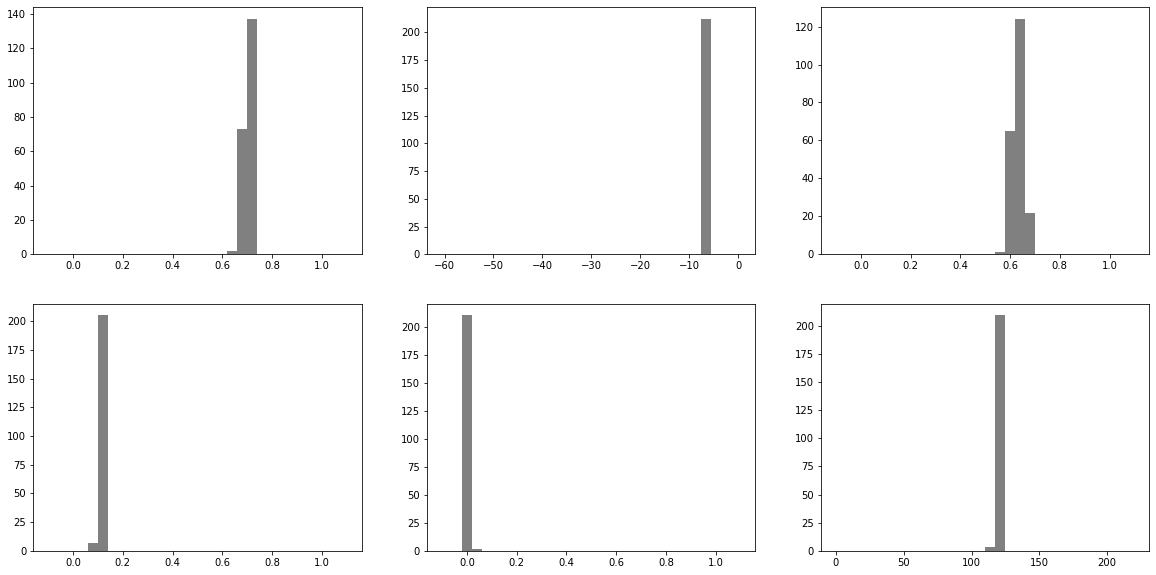

In [32]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].hist(time_series['danceability'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[0, 1].hist(time_series['loudness'], 30, range=[-60.5, 0.5], facecolor='gray', align='mid')
axs[0, 2].hist(time_series['energy'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 0].hist(time_series['speechiness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 1].hist(time_series['instrumentalness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 2].hist(time_series['tempo'], 30, range=[0, 220], facecolor='gray', align='mid')
plt.show()

In [33]:
time_series

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
weeks,,,,,,,,,,,,,,
2016-12-30,42.775,224075.315,0.676205,0.663160,5.025,-6.004630,0.565,0.119736,0.178528,0.007744,0.163153,0.505095,119.488045,4.015
2017-01-06,42.120,224966.590,0.676690,0.651549,5.025,-6.104685,0.570,0.120731,0.193208,0.007167,0.166108,0.492490,118.907445,4.015
2017-01-13,40.150,222369.245,0.678430,0.659184,5.045,-6.001335,0.580,0.117302,0.187971,0.011794,0.159308,0.490165,121.027190,4.010
2017-01-20,41.030,223224.110,0.675095,0.648564,5.020,-6.083500,0.595,0.116811,0.201438,0.009043,0.160494,0.481990,120.909295,4.010
2017-01-27,40.990,223770.935,0.682055,0.651479,5.010,-6.014540,0.595,0.118323,0.194101,0.007868,0.161858,0.485645,120.829000,4.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,83.540,198804.725,0.695670,0.625670,5.635,-6.123535,0.500,0.112163,0.260883,0.006104,0.172459,0.547268,120.540200,3.980
2021-01-08,83.805,198184.340,0.692295,0.618990,5.590,-6.169955,0.530,0.111520,0.274262,0.006402,0.167649,0.531063,120.914225,3.965
2021-01-15,83.875,197258.080,0.696510,0.615675,5.525,-6.220715,0.510,0.114074,0.263582,0.007325,0.166143,0.532002,122.190095,3.965


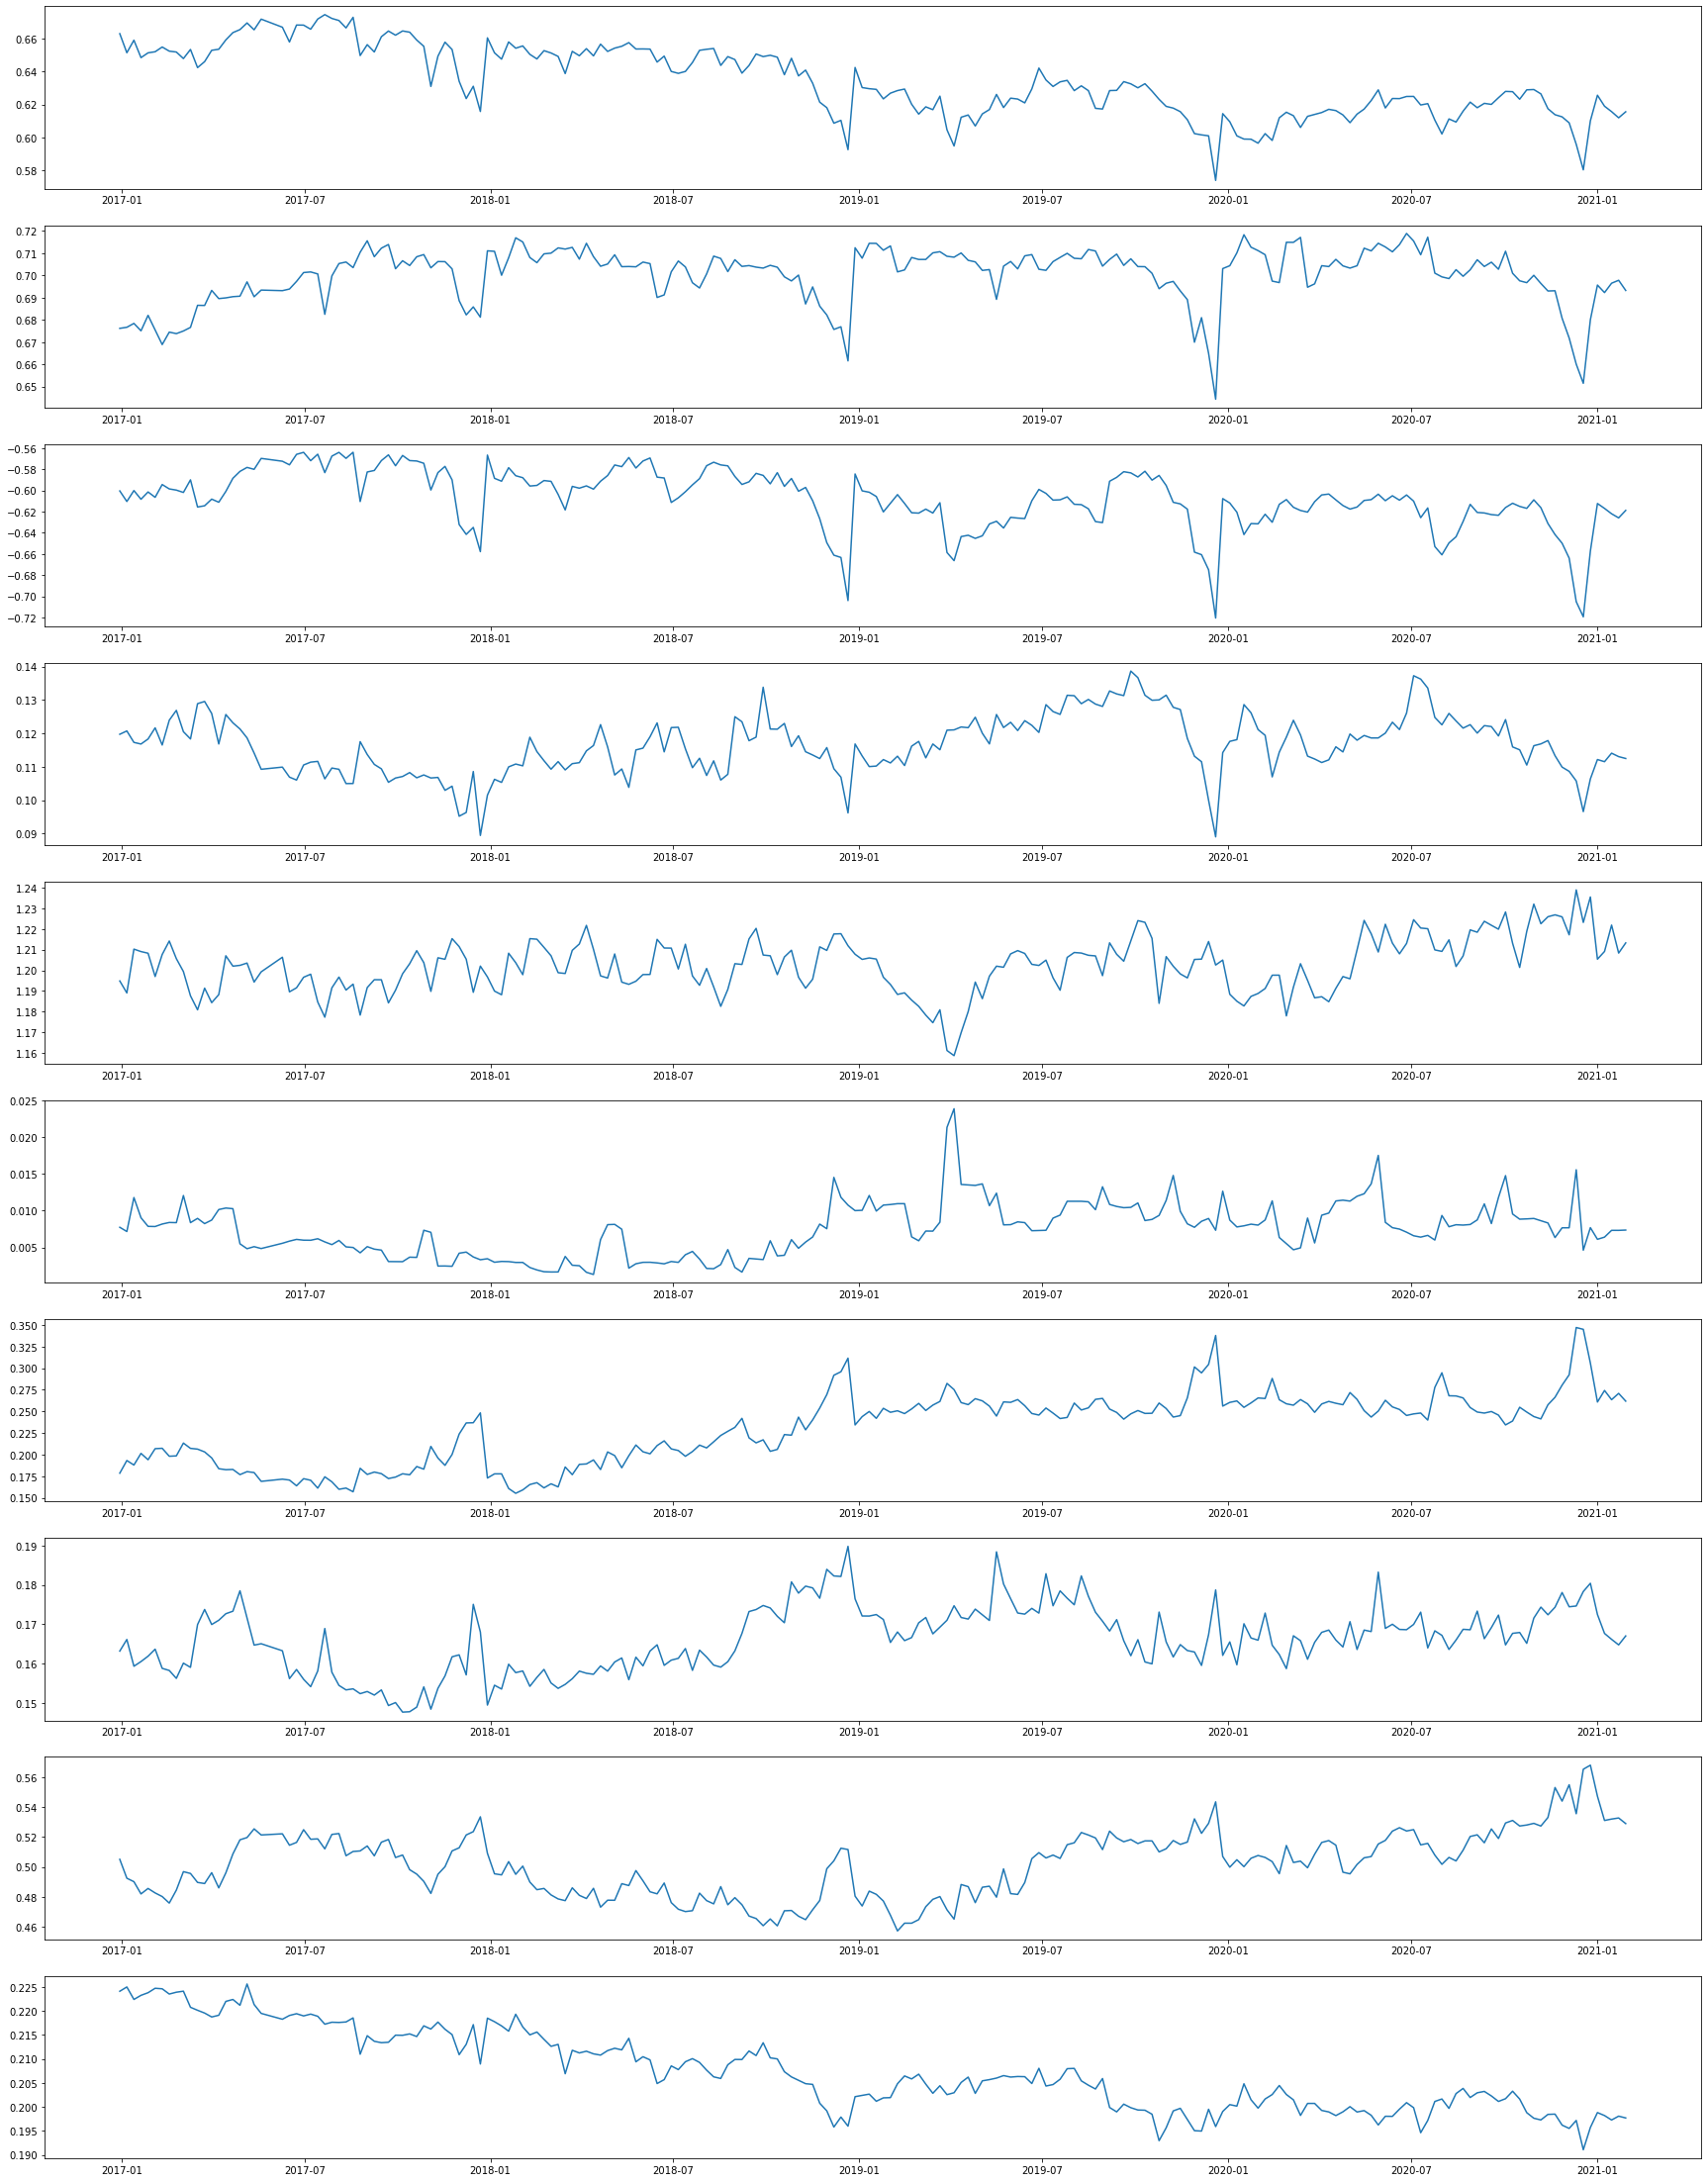

In [45]:
fig, axs = plt.subplots(10, figsize=(30, 40))
axs[0].plot(time_series['energy'])
axs[1].plot(time_series['danceability'])
axs[2].plot(time_series['loudness'])
axs[3].plot(time_series['speechiness'])
axs[4].plot(time_series['tempo'])
axs[5].plot(time_series['instrumentalness'])
axs[6].plot(time_series['acousticness'])
axs[7].plot(time_series['liveness'])
axs[8].plot(time_series['valence'])
axs[9].plot(time_series['duration'])

In [35]:
time_series2 = time_series

In [36]:
time_series2["duration"] = time_series2["duration"]/1000000

In [37]:
time_series2["popularity"] = time_series2["popularity"]/100

In [38]:
time_series2["tempo"] = time_series2["tempo"]/100

In [39]:
time_series2["loudness"] = time_series2["loudness"]/10

In [40]:
time_series2=time_series2.drop("key", axis=1)

In [41]:
time_series2["time_signature"] = time_series2["time_signature"]/10

In [42]:
time_series2

,popularity,duration,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
weeks,,,,,,,,,,,,,
2016-12-30,0.42775,0.224075,0.676205,0.663160,-0.600463,0.565,0.119736,0.178528,0.007744,0.163153,0.505095,1.194880,0.4015
2017-01-06,0.42120,0.224967,0.676690,0.651549,-0.610469,0.570,0.120731,0.193208,0.007167,0.166108,0.492490,1.189074,0.4015
2017-01-13,0.40150,0.222369,0.678430,0.659184,-0.600133,0.580,0.117302,0.187971,0.011794,0.159308,0.490165,1.210272,0.4010
2017-01-20,0.41030,0.223224,0.675095,0.648564,-0.608350,0.595,0.116811,0.201438,0.009043,0.160494,0.481990,1.209093,0.4010
2017-01-27,0.40990,0.223771,0.682055,0.651479,-0.601454,0.595,0.118323,0.194101,0.007868,0.161858,0.485645,1.208290,0.4010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,0.83540,0.198805,0.695670,0.625670,-0.612354,0.500,0.112163,0.260883,0.006104,0.172459,0.547268,1.205402,0.3980
2021-01-08,0.83805,0.198184,0.692295,0.618990,-0.616996,0.530,0.111520,0.274262,0.006402,0.167649,0.531063,1.209142,0.3965
2021-01-15,0.83875,0.197258,0.696510,0.615675,-0.622071,0.510,0.114074,0.263582,0.007325,0.166143,0.532002,1.221901,0.3965


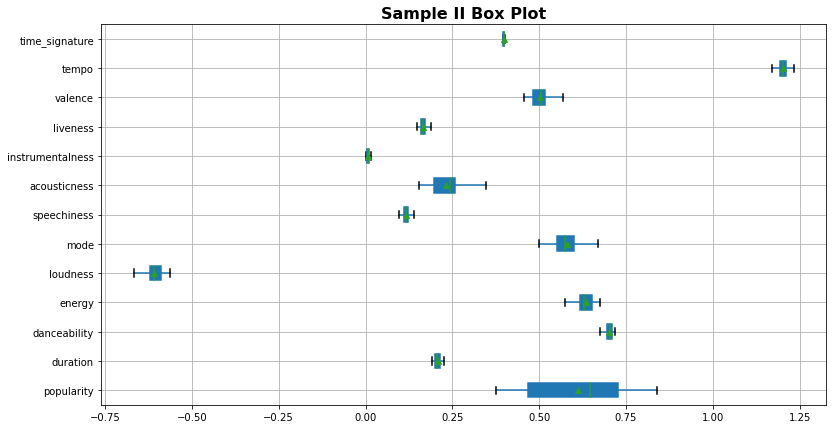

In [43]:
time_series2.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Sample II Box Plot", fontsize=16, fontweight='heavy')
plt.show()

